In [166]:
%reload_ext autoreload
%autoreload
#%aimport

import numpy as np

from Electromagnetics.RecGridND import *

n_dim_space = 1

x0, x1, dx = None, None, None
n_dim = n_dim_space+1
BC = 'IC'
make_refinements = False
S = 0.9

assert n_dim>1
if n_dim==2:
    x0 = np.array([0.0, 0.0])
    x1 = np.array([1.0, 0.2])
    dx = np.array([0.05, S*0.05])
elif n_dim==3:
    x0 = np.array([0.0, 0.0, 0.0])
    x1 = np.array([1.0, 1.0, 1.0])
    dx = np.array([0.35, 0.25, 0.20])

    
rg = RGND(x0, x1, dx)


if make_refinements:
    pass


rg.NodesGetConnectedCells()
rg.SetupBoundaryCellConnections()
assert rg.VerifyInternalAndBorderCellsContinuity()


-- [20  5] 100


In [167]:
from sympy import symbols, Function, Derivative, latex, sin, cos, exp, lambdify
from IPython.display import display, Math, Latex

c_ph = 1.0
f_ex = None

if n_dim==2:
    t, x, y, z = symbols('t, x, y, z')
    f = Function('f')(x,t)

    c = c_ph
    eq_0 = Derivative(f, x, 2) - 1/c**2*Derivative(f, t, 2)
    
    print('differential equation:')
    display(Math(latex(eq_0)))

    #rg.AttachDiffEquations(eqs_list=[eq_0, eq_1], vars_list=[f, g], pars_list=[gamma], indepVars_list=[x, y])
    rg.AttachDiffEquations(eqs_list=[eq_0], vars_list=[f], pars_list=[], indepVars_list=[x, t])

    eq_parts = rg.DisintegrateEquations()
    print(eq_parts)
    
    sigma = 2.0
    x_mid = 0.0
    
    ##-- boundary coditions
    f_ex = exp(-sigma*((t-x)/c)**2)*cos((t-x)/c)
    f_t0 = f_ex.subs(t, 0)
    dfdt_t0 = Derivative(f_ex, t).doit().subs(t, 0)
    f_x0 = f_ex.subs(x,0)
    dfdx_x0 = Derivative(f_ex, x).doit().subs(x, 0)
    f_x1 = f_ex.subs(x, x1[0])
    f_t1 = f_ex.subs(t, x1[1])
    
    rg.ResetBoundaryConditions()
    if BC == 'BC':
        rg.AddBoundaryCondition({'expr':f-f_x0, 'dir':0, 'face':'n'})
        rg.AddBoundaryCondition({'expr':f-f_x1, 'dir':0, 'face':'p'})
        rg.AddBoundaryCondition({'expr':f-f_t0, 'dir':1, 'face':'n'})
        rg.AddBoundaryCondition({'expr':Derivative(f,t,1)-dfdt_t0, 'dir':1, 'face':'n'})
        #rg.AddBoundaryCondition({'expr':f-f_t1, 'dir':1, 'face':'n'})
    elif BC=='IC':
        rg.AddBoundaryCondition({'expr':f-f_x0, 'dir':0, 'face':'n'})
        rg.AddBoundaryCondition({'expr':Derivative(f,x,1)-dfdx_x0, 'dir':0, 'face':'n'})
        rg.AddBoundaryCondition({'expr':f-f_t0, 'dir':1, 'face':'n'})
        rg.AddBoundaryCondition({'expr':Derivative(f,t,1)-dfdt_t0, 'dir':1, 'face':'n'})
    else:
        raise NotImplementedError()
        

    f_cc = []
    f_cc.append({'der':0, 'dir':0, 'face':'n'})
    f_cc.append({'der':0, 'dir':1, 'face':'n'})
    f_cc.append({'der':1, 'dir':0, 'face':'n'})
    f_cc.append({'der':1, 'dir':1, 'face':'n'})
    rg.DefineContinuityCondsAcrossCellBorders({f:f_cc})


    poly_order = [[9, 9]]
    poly_order_max = [[7, 7]]
    der_order_max = [[2, 2]]
elif n_dim==3:
    t, x, y, z = symbols('t, x, y, z')
    f = Function('f')(x,y,t)

    eq_0 = Derivative(f, x, 2) + Derivative(f, y, 2) - Derivative(f, t, 2)
    print('differential equation:')
    display(Math(latex(eq_0)))

    #rg.AttachDiffEquations(eqs_list=[eq_0, eq_1], vars_list=[f, g], pars_list=[gamma], indepVars_list=[x, y])
    rg.AttachDiffEquations(eqs_list=[eq_0], vars_list=[f], pars_list=[], indepVars_list=[x, y, t])

    eq_parts = rg.DisintegrateEquations()
    print(eq_parts)

    ##-- boundary coditions
    rg.ResetBoundaryConditions()
    if BC == 'BC':
        rg.AddBoundaryCondition({'expr':f, 'dir':0, 'face':'n'})
        rg.AddBoundaryCondition({'expr':f, 'dir':0, 'face':'p'})
        rg.AddBoundaryCondition({'expr':f, 'dir':1, 'face':'n'})
        rg.AddBoundaryCondition({'expr':f, 'dir':1, 'face':'p'})
        rg.AddBoundaryCondition({'expr':f-f_0t, 'dir':2, 'face':'n'})
        rg.AddBoundaryCondition({'expr':Derivative(f,t,1)-df_0t, 'dir':2, 'face':'p'})
    elif BC=='IC':
        rg.AddBoundaryCondition({'expr':f, 'dir':0, 'face':'n'})
        rg.AddBoundaryCondition({'expr':Derivative(f,x,1), 'dir':0, 'face':'n'})
        rg.AddBoundaryCondition({'expr':f, 'dir':1, 'face':'n'})
        rg.AddBoundaryCondition({'expr':Derivative(f,y,1), 'dir':1, 'face':'n'})
        rg.AddBoundaryCondition({'expr':f-f_0t, 'dir':2, 'face':'n'})
        rg.AddBoundaryCondition({'expr':Derivative(f,t,1)-df_0t, 'dir':2, 'face':'p'})
    else:
        raise NotImplementedError()
        

    f_cc = []
    f_cc.append({'der':0, 'dir':0, 'face':'n'})
    f_cc.append({'der':0, 'dir':1, 'face':'n'})
    f_cc.append({'der':0, 'dir':2, 'face':'n'})
    f_cc.append({'der':1, 'dir':0, 'face':'n'})
    f_cc.append({'der':1, 'dir':1, 'face':'n'})
    f_cc.append({'der':1, 'dir':2, 'face':'n'})
    rg.DefineContinuityCondsAcrossCellBorders({f:f_cc})


    poly_order = [[7, 7, 7]]
    poly_order_max = [[5, 5, 5]]
    der_order_max = [[2, 2, 2]]

rg.SetPolynomialBasisFuncs(poly_order)
rg.SetMaxPolyOrderToKeepForEachEq(poly_order_max)
rg.SetMaxDerivativeOrderForEachVar(der_order_max)

x_vec = rg.SetupMatrixEQs()
print(x_vec)
print('x_vec:', 'min:', np.min(np.abs(x_vec)), 'max:', np.max(np.abs(x_vec)), sep='\n')

rg.SetPolyBasisCoeffs(x_vec)


differential equation:


<IPython.core.display.Math object>

[[[[[-1.00000000000000, 2, [t, t]], [1, 2, [x, x]]]]], [0]]
self.indexInfo :  [{'N': 100}]
n_unkn_v:  [60]
cell_n_tot__vars:  [60]
n_unkn_v:  [60]
n_ind:
60
inds_keep:
[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]]
inds_0_all:
[[ 0  1  2  3  4  5  6  7  8  9 -1 -1]
 [10 11 12 13 14 15 16 17 18 19 -1 -1]
 [20 21 22 23 24 25 26 27 -1 -1 -1 -1]
 [28 29 30 31 32 33 34 35 -1 -1 -1 -1]
 [36 37 38 39 40 41 -1 -1 -1 -1 -1 -1]
 [42 43 44 45 46 47 -1 -1 -1 -1 -1 -1]
 [48 49 50 51 -1 -1 -1 -1 -1 -1 -1 -1]
 [52 53 54 55 -1 -1 -1 -1 -1 -1 -1 -1]
 [56 57 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [58 59 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]
mask_all:
[[1 1 1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 1 1 0 0 0 0]
 [

<IPython.core.display.Math object>

eq_part: [1, 2, [x, x]]


<IPython.core.display.Math object>

eqs_inds_all:
[[[[2, 20], [3, 21], [4, 22], [5, 23], [6, 24], [7, 25], [8, 26], [9, 27], [-1, -1], [-1, -1], [12, 28], [13, 29], [14, 30], [15, 31], [16, 32], [17, 33], [18, 34], [19, 35], [-1, -1], [-1, -1], [22, 36], [23, 37], [24, 38], [25, 39], [26, 40], [27, 41], [-1, -1], [-1, -1], [30, 42], [31, 43], [32, 44], [33, 45], [34, 46], [35, 47], [-1, -1], [-1, -1], [38, 48], [39, 49], [40, 50], [41, 51], [-1, -1], [-1, -1], [44, 52], [45, 53], [46, 54], [47, 55], [-1, -1], [-1, -1], [50, 56], [51, 57], [-1, -1], [-1, -1], [54, 58], [55, 59], [-1, -1], [-1, -1], [-1, -1], [-1, -1], [-1, -1], [-1, -1]]]]
n_ind_x:
24
eqs_inds_keep:
[[[None, None, [22], [23], [24], [25], [26], [27], None, None, None, None, [30], [31], [32], [33], [34], [35], None, None, [22], [23], [24, 38], [25, 39], [26, 40], [27, 41], None, None, [30], [31], [32, 44], [33, 45], [34, 46], [35, 47], None, None, [38], [39], [40, 50], [41, 51], None, None, [44], [45], [46, 54], [47, 55], None, None, [50], [51], None, None,

<IPython.core.display.Math object>

arr_F:
[3750.0, 625.0, 6250.0, 1875.0, 18750.0, 26250.0, 35000.0, 45000.0, 3750.0, 625.0, 6250.0, 1875.0, 18750.0, 26250.0, 35000.0, 45000.0, 625.0, 3750.0, 1875.0, 6250.0, 9375.0, 3750.0, 13125.0, 6250.0, 625.0, 3750.0, 1875.0, 6250.0, 9375.0, 3750.0, 13125.0, 6250.0, 1250.0, 3750.0, 1250.0, 3750.0]
inds_F:
[4, 22, 5, 23, 6, 7, 8, 9, 14, 30, 15, 31, 16, 17, 18, 19, 38, 24, 39, 25, 26, 40, 27, 41, 44, 32, 45, 33, 34, 46, 35, 47, 50, 51, 54, 55]
inds_0_F:
[22, 22, 23, 23, 24, 25, 26, 27, 30, 30, 31, 31, 32, 33, 34, 35, 38, 38, 39, 39, 40, 40, 41, 41, 44, 44, 45, 45, 46, 46, 47, 47, 50, 51, 54, 55]
--------------------
coeff_sym: -1.00000000000000
coeff_sym:  -1.00000000000000
eq_part: [1, 2, [x, x]]


<IPython.core.display.Math object>

arr_F:
[400.0, 2400.0, 400.0, 2400.0, 800.0, 800.0, 800.0, 800.0, 1200.0, 4000.0, 1200.0, 4000.0, 2400.0, 2400.0, 2400.0, 2400.0, 6000.0, 2400.0, 6000.0, 2400.0, 2400.0, 6000.0, 2400.0, 6000.0, 8400.0, 4000.0, 8400.0, 4000.0, 4000.0, 8400.0, 4000.0, 8400.0, 22400.0, 22400.0, 28800.0, 28800.0]
inds_F:
[22, 36, 23, 37, 24, 25, 26, 27, 30, 42, 31, 43, 32, 33, 34, 35, 48, 38, 49, 39, 40, 50, 41, 51, 52, 44, 53, 45, 46, 54, 47, 55, 56, 57, 58, 59]
inds_0_F:
[22, 22, 23, 23, 24, 25, 26, 27, 30, 30, 31, 31, 32, 33, 34, 35, 38, 38, 39, 39, 40, 40, 41, 41, 44, 44, 45, 45, 46, 46, 47, 47, 50, 51, 54, 55]
--------------------
coeff_sym: 1
coeff_sym:  1
n_dir: 0 d_ord: 0 lev: 0 dr: [ 1.  0.]
arr_I_FL_f0[n_dir]:
[{0: 1.0}, {1: 1.0}, {2: 1.0}, {3: 1.0}, {4: 1.0}, {5: 1.0}, {6: 1.0}, {7: 1.0}, {8: 1.0}, {9: 1.0}]
inds_0_FL_f0[n_dir]:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
arr_I_FL_f0_nb[n_dir]:
[{0: 1.0, 48: 1.0, 58: 1.0, 20: 1.0, 56: 1.0, 36: 1.0, 10: 1.0, 28: 1.0, 42: 1.0, 52: 1.0}, {1: 1.0, 53: 1.0, 43: 1

In [168]:
n_pts_dim = [50]*n_dim
gslice=None
if n_dim==3:
    gslice = [{'dir':0, 'val':0.5}]
mesh, var_vals = rg.GetVarValuesOnMesh(0, n_pts_dim, gslice)


/home/nima/ipython workspace/Electromagnetics/RecGridND.py:4150: ComplexWarning: Casting complex values to real discards the imaginary part
  var_vals[i] = self.GetVariableValueAtPointsInsideCell(var_ind, lev, c_ind, [pt_i], printit=printit)[0]


Populating the interactive namespace from numpy and matplotlib
max: 1.0000051956 min: 0.000787920320589


`%matplotlib` prevents importing * from pylab and numpy


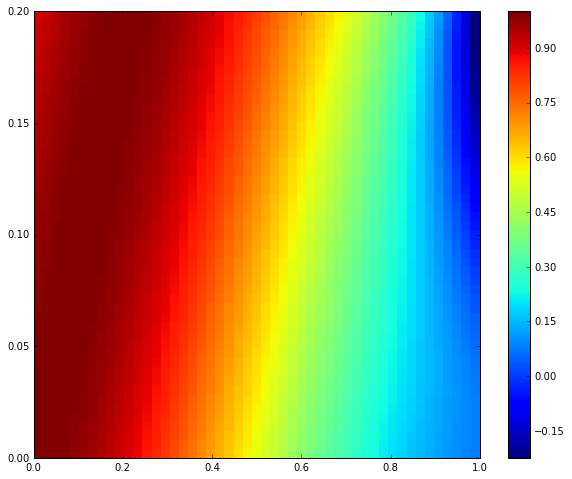

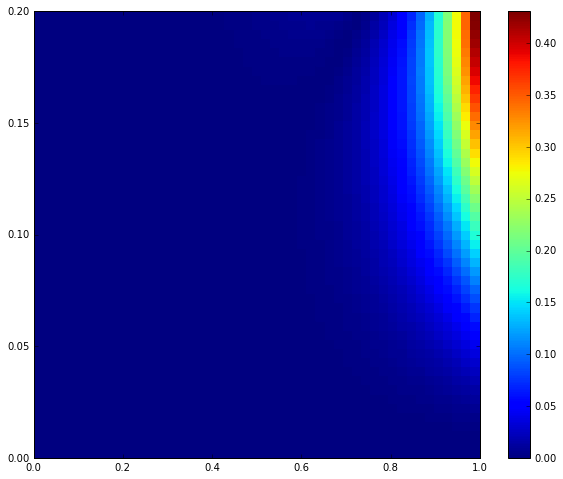

In [169]:
%pylab inline

figsize(10,8)
if n_dim==1:
    X, Y = mesh[0], var_vals
    print(X.shape, Y.shape)
    plot(X, Y)
    
    Y_0 = np.cos(4.0*X) 
    if has_rhs:
        Y_0 = np.cos(4.0*X) + X
    plot(X, Y_0, 'r')
    show()
        
elif n_dim==2:
    X, Y = mesh[0], mesh[1]
    Z = var_vals
    print('max:', np.max(np.abs(Z)), 'min:', np.min(np.abs(Z)))
    #im = imshow(Z, interpolation='bilinear', cmap=cm.rainbow)#, origin='lower', extent=[-3,3,-3,3], vmax=abs(Z).max(), vmin=-abs(Z).max())
    im = pcolor(X, Y, Z)
    CBI = plt.colorbar(im, orientation='vertical', shrink=1.0)
    show()
    
    Z_anal = lambdify((t,x), f_ex, 'numpy')(Y, X)
    Z_err = np.abs(Z-Z_anal)
    #im = imshow(Z_err, interpolation='bilinear', cmap=cm.rainbow)
    im = pcolor(X, Y, Z_err)
    CBI = plt.colorbar(im, orientation='vertical', shrink=1.0)
    show()
elif n_dim==3:
    Z = var_vals
    print('max:', np.max(np.abs(Z)), 'min:', np.min(np.abs(Z)))
    im = imshow(Z, interpolation='bilinear', cmap=cm.rainbow)#, origin='lower', extent=[-3,3,-3,3], vmax=abs(Z).max(), vmin=-abs(Z).max())
    CBI = plt.colorbar(im, orientation='vertical', shrink=1.0)
    show()
    
    X, Y = mesh[0], mesh[1]
    Z_anal = np.cos(X)*np.cos(Y)*cos(0.5)
    Z_err = np.abs(Z-Z_anal)
    im = imshow(Z_err, interpolation='bilinear', cmap=cm.rainbow)
    CBI = plt.colorbar(im, orientation='vertical', shrink=1.0)
    show()
    